<a href="https://colab.research.google.com/github/cathepsin/alpha_beta_ProtBERT/blob/main/protbert_burn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MM-BERT MLM Predictions With ProtBERT

<h1><em><strong>MM-BERT MLM Predictions. Does this update?</strong></em></h1>
<p>
Current version of the JLPrice lab ProtBERT implementation. Modified and in-testing to process batches of sequences<br><br>
A simple implementation of BERT for multiple-mask protein predicitons for use with Google Colab. This implementation uses the <a href=https://huggingface.co/Rostlab/prot_bert>prot_bert</a> pretrained model.<br>

<br>Eventually a full python implementation will be made for usage on local or remote machines<br>

This implementation supports both fine-tuning and multiple-mask MLM predictions.<hr>

<h3><em><strong>README</strong></em></h3>
This was designed with simplicity and clarity as a priority. Unfortunately, however, there is a lot going on and simplicity can only go so far before effectiveness, accuracy, or usefulness are hindered. As much as is possible, this notebook should be mostly intuitive and easy to work with. Please read through the entire README section and the rest of this notebook before running anything for a much smoother experience.
<br>
<br>
<h4><strong>Running</h4></strong>
A session can be started most easily by running the cell below titled <code>Setup, Imports, and Connect to Runtime</code>. Once a runtime session is started, files can be uploaded and interacted with. Alternatively, you can also click the <code>Connect</code> button located at the top-right of your screen (underneath the <code>Comment</code> and <code>Share</code> buttons).
<br>
<br>
Once parameters are set and configured, run by doing:
<blockquote><code>Runtime >> Run all</code></blockquote>
or
<blockquote><code>Runtime >> Restart and run all</code></blockquote>
or run each cell manually

<h4><strong>Configure or Refresh Model</strong></h4>
The model must first be initialized and configured before running. Scroll down to the cell titled <code>Configure or Refresh Model</code> and set your desired settings. Custom weights can be used for both MM-MLM predicitons and for fine-tuning, though are not required. Custom weights can come from your computer, your Google Drive, or your current session of Google Colab. The <code>path_to_file_in_colab</code> parameter is only considered if <code>From COLAB</code> is selected. If you don't know how to use custom weights, don't use them, but do know that most utility in this program is lost without learning how to customize weights.
<br>
<br>
You can also choose whether or not to fine-tune or run MM-MLM predictions using the checkboxes in the cell below.

<h4><strong>Fine tuning</strong></h4>
Fine tuning helps the model to produce output that follows the "style" of some dataset. <strong>A text file (~.txt) must be provided</strong>, and ideally only characters included in the <a href=https://huggingface.co/Rostlab/prot_bert/blob/main/vocab.txt>prot_bert vocabulary</a> should be present. The vocabulary contains the 1-letter-codes for the 20 standard amino acids, a placeholder <code>X</code> token, and some other important tokens that are automatically inserted and dealt with by this program. Example fine-tuning files can be found <a href=https://github.com/cathepsin/protein_BERT_DATASETS>here</a>.
<br>
<br>
Note that larger text files, though inherently better for fine-tuning, may result in much longer runtimes or running out of CUDA memory. If your <code>batch size</code> cannot exceed about 16 then your file is likely too large.
<br>
<br>
 <strong>Go through and set the fine-tuning parameters before running</strong>
<br>
<br>
<font color=f2371b>
<strong>If you recieve an error stating that CUDA has run out of memory</strong>, it is extremely likely that there will be unresolvable errors in your session of Google Colab. To resolve this issue, you typically must click<br>

<code>Runtime >> Disconnect and delete runtime</code><br>

and then begin again.<br>
</font>
<br>
Fine-tuned weights can be downloaded to your computer or saved directly to your Google Drive. Note that weight files are approximately 1.56 Gb.

<h4><strong>BERT Mask Predicitons</strong></h4>
All versions of BERT are intrinsicly most valuable within some larger framework, rather than as a standalone model. BERT is an encoding model, and as such its purpose is to take input data and output some representation of that data in a way that is more valuable for a computer. Here, however, we show that this method of encoding data can be altered to become a generation or modification technique.
<br><br>
BERT is trained and further fine-tuned through a process similar to the word game <em>Mad-Libs</em>. It is provided some input with blanked-out or masked data, and its goal is to fill-in-the-blanks correctly. Its training process centers around how well it is able to correctly guess the correct data that was removed from the input.
<br><br>
We can essentially proofread input to be more similar to what it was provided in training or fine-tuning. To do this, a provided input sequence or starting place is manually masked as instructed in the cell below titled <code>ProtBERT Prediction</code>. We then modify a starting point using the psuedocode below:<br>

<pre><code><strong>function</strong> MakeChanges(mask_indeces, input_sequence, threshold_change_percent, num_changes_to_make){
  results = List.of(tuple&ltScore, Character&gt)
  <strong>for each</strong> index <strong>in</strong> mask_indeces{
    confidence_score, replacement_character = BERTModel.Predict(sequence, index)
    results.add([confidence_score, replacement_character])
  }
  best_results = GetBestResults(num_changes_to_make, results)
  altered_sequence = MakeChanges(best_results, sequence)
  <strong>return</strong> altered_sequence
}</code></pre>
<br>
Essentially what this is doing is taking some user-defined input and its masked locations to analyze one amino acid at a time. Only one mask is placed upon the sequence at any moment so that the model can use the remainder of the sequence for context in making predictions. The model then will pool every possible change and take all changes that are above some user-defined threshold percent and make changes up to the number of requested changes.
<br>
<br>
This then repeats each time using the previous iteration's altered sequence as a new starting point until there are no possible changes above the threshold percent can be made.
<br>
<br>
Refer to the <code>ProtBERT Prediction</code> cell for more complete descriptions of different settings and parameters that can be used.
<br>
<br>
Constructed sequence structures can be estimated using <a href=https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb>ColabFold: AlphaFold2 using MMseqs2</a>

<h4><strong>Google Drive and Google Colab semantics</strong></h4>
At several points, you are able to connect directly to your Google Drive. If an option below is selected that connects to your Google Drive, a popup will appear asking for permission to connect and interact.
<br>
<br>
Files in your Google Drive appear in the Colab file explorer under <code>/content/gdrive/MyDrive</code>. Thus, if you want to save a file to a folder titled "save_states" in your Google Drive, you would save the state using:
<blockquote><code>/content/gdrive/MyDrive/save_states</code></blockquote>

</p>

#ProtBERT Setup

In [ ]:
#@title Setup, Imports, and Connect to Runtime

!pip install -q transformers
from termcolor import colored
from transformers import BertTokenizer, BertForMaskedLM, pipeline
from transformers import AdamW
import os
import torch
from tqdm import tqdm
from google.colab import drive
from google.colab import files
from time import gmtime, strftime
import re
import copy as cp
import sys
import random
import matplotlib.pyplot as plt



tokenizer = BertTokenizer.from_pretrained('Rostlab/prot_bert')
model = BertForMaskedLM.from_pretrained('Rostlab/prot_bert')




Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#@title Configure or Refresh Model
#@markdown <hr>
#@markdown Specify if you have pre-trained weights you want to use as a starting point for fine-tuning and/or predictions. Pre-trained weights can come from your computer, your Google drive, or can be accessed as a file if downloaded already to your current session of Google COLAB.
use_custom_weights = 'From Google Drive' #@param ["No", "From COLAB", "From Google Drive",  "From computer"]
#@markdown If using weights from COLAB or your Google Drive, right click the uploaded weights file and copy-and-paste the path to the space below. If uploading from your computer then <code>path_to_file_in_colab</code> is not considered during runtime. The path to your weights in Google Drive can be specified using <blockquote>/content/gdrive/MyDrive/destination/folder/in/your/drive</blockquote>If <code>From computer</code> is selected, then you will be prompted to upload a file.
path_to_file_in_colab = '/content/gdrive/MyDrive/Save States/save_state_remake2' #@param {type:"string"}
#@markdown Check this box if you want to fine tune the model. This can take several hours.
fine_tune_model = False #@param {type:"boolean"}
#@markdown Check this box if you want to run MLM predictions on a sequence.
MLM_model = True #@param {type:"boolean"}


tokenizer = BertTokenizer.from_pretrained('Rostlab/prot_bert')
model = BertForMaskedLM.from_pretrained('Rostlab/prot_bert')

if use_custom_weights == 'From COLAB':
  #Make sure paths exist and are valid
  assert path_to_file_in_colab, 'No path given'
  assert os.path.isfile(path_to_file_in_colab), 'Invalid filepath'
  model.load_state_dict(torch.load(path_to_file_in_colab))
elif use_custom_weights == 'From Google Drive':
  #Attach gdrive to runtime
  drive.mount('/content/gdrive', force_remount=True)
  model.load_state_dict(torch.load(path_to_file_in_colab))
elif use_custom_weights == 'From computer':
  #prompt user to upload weight file
  model.load_state_dict(torch.load(files.upload()))







Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Mounted at /content/gdrive


#ProtBERT Finetune

In [ ]:
#@markdown Skipped if <code>fine_tune_model</code> is unchecked
#@markdown <hr>
#@markdown Origin of the fine-tune ~.txt file
fine_file = 'From COLAB' #@param ["From COLAB", "From Google Drive",  "From computer"]
#@markdown If using a ~.txt from COLAB or your Google Drive, right click the uploaded ~.tx file and copy-and-paste the path to the space below. If uploading from your computer then <code>path_to_ft_file</code> is not considered during runtime. The path to your ~.txt in Google Drive can be specified using <blockquote>/content/gdrive/MyDrive/destination/folder/in/your/drive</blockquote>If <code>From computer</code> is selected, then you will be prompted to upload a file.
path_to_ft_file = '/content/output_beta2.txt' #@param {type:"string"}
#@markdown Percent of the fine-tune file to mask while training. Set to <code>0.15</code> unless you know what you are doing
percent_mask = 0.15 #@param {type:"number"}
#@markdown Number of residues to read from each line in the input file. Note that for very large files, the GPU may run out of memory if set too high.
max_len =  65#@param {type: "integer"}
#@markdown Batch size for training. Note that for very large files, the GPU may run out of memory if set too high. Sequences are truncated if longer than the specified length and padded if less than the specified length.
batch_size =  108#@param {type: "integer"}
#@markdown Number of training periods. Linearly increases time required to train.
number_of_epochs =  100#@param {type:"integer"}
#@markdown Number of training steps (not epochs) between saves and evaluations.
save_every = 1000 #@param {type:"integer"}
#@markdown Save final state to drive
save_to_drive = True #@param {type:"boolean"}
#@markdown Save to folder in drive<br><blockquote>Format as: <em><font color=FF4C49>/content/gdrive/MyDrive/destination/folder/in/your/drive</font><em></blockquote>
colab_save_path = '/content/gdrive/MyDrive/Save States/' #@param {type: "string"}
#@markdown Save most recent state to drive. If selected, the weights will be saved every <code>save_every</code> steps.
save_recent_state_to_drive = False #@param {type: "boolean"}
save_to_session = True #@param {type: "boolean"}
#@markdown Save most recent state to drive location:
path_to_most_recent = '/content/gdrive/MyDrive/Saves/' #@param {type:"string"}
#@markdown Download final state to computer
download_to_computer = False #@param {type:"boolean"}
#@markdown Learning rate for AdamW optimizer. Set to <code>0.00005</code> unless you know what you are doing.
learning_rate = 0.00005 #@param {type:"number"}
#@markdown Smart learning. Update learning rate every epoch to more finely converge to a target weight. BETA
smart_learn = True #@param {type:"boolean"}
#@markdown Smart learning steps. Update learning rate every epoch to more finely converge to a target weight. BETA
smart_steps = 500 #@param {type:"integer"}
#@markdown *<font color=cc3300><em>If the GPU runs out of memory, the model must be refreshed or the runtime must be restarted</font></em>

if save_to_drive:
  from google.colab import drive
  drive.mount('/content/gdrive')

def RunningAvg(lst):
  ret = []
  for i in range(len(lst)):
    try:
      ret.append(sum(lst[0:i])/len(lst[0:i]))
    except ZeroDivisionError:
      ret.append(0)
  return ret

def GetAccuracy(input_id, labels, logits, mask_label = 4):
  num_correct = 0
  total = 0
  for i in range(len(input_id)):
    for v in input_id[i]:
      if input_id[i][v] == mask_label:
        total += 1
        val = torch.argmax(torch.softmax(logits[i][v], -1))
        if labels[i][v] == val:
          num_correct += 1
  return num_correct / total

class ProtDataset(torch.utils.data.Dataset):
  def __init__(self, encodings):
    self.encodings = encodings

  def __getitem__(self, index):
    return {key: val[index].clone().detach() for key, val in self.encodings.items()}

  def __len__(self):
    return len(self.encodings.input_ids)

if fine_tune_model:
  if fine_file == 'From COLAB':
    fp = path_to_ft_file
  elif fine_file == 'From Google Drive':
    drive.mount('/content/gdrive')
    fp = path_to_ft_file
  else:
    up = files.upload()
    fp = list(up.keys())[0]
    up.clear()
    pass

  with open(fp, 'r') as f:
    text = f.read().split('\n')
    for i in range(len(text)):
      text[i] = " ".join(text[i])

  print("Tokenizing file...")
  inputs = tokenizer(text, return_tensors='pt', max_length=max_len, truncation=True, padding='max_length')
  inputs['labels'] = inputs.input_ids.detach().clone()
  rand = torch.rand(inputs.input_ids.shape)
  mask_ar = (rand < percent_mask) * (inputs.input_ids != 2) * (inputs.input_ids != 0) * (inputs.input_ids != 3)

  selection = []
  for i in range(mask_ar.shape[0]):
    selection.append(torch.flatten(mask_ar[i].nonzero()).tolist())

  for i in range(mask_ar.shape[0]):
    inputs.input_ids[i, selection[i]] = 4

  dataset = ProtDataset(inputs)
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
  device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
  if not torch.cuda.is_available():
    print("No CUDA enabled GPU available. Running on CPU")

  model.to(device);
  model.train();

  optim = torch.optim.AdamW(model.parameters(), lr=learning_rate)

  cnt = 1
  graph_count = []
  graph_loss = []
  graph_accuracies = []
  # nan = open('nan.txt', 'w')
  # debug = open('debug.txt', 'w')
  for epoch in range(number_of_epochs):
    loop = tqdm(dataloader, position=0, leave=True)
    for batch in loop:
      optim.zero_grad()
      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      labels = batch['labels'].to(device)
      outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

      loss = outputs.loss
      loss.backward()
      optim.step()

      graph_count.append(cnt)
      graph_loss.append(loss.item())

      graph_accuracies.append(GetAccuracy(input_ids, labels, outputs['logits']))
      # debug.write(f"{cnt} {graph_accuracies[-1]} {loss}\n")
      # debug.write(f"\t{outputs['logits']}\n")
      # for l in outputs['logits']:
      #   for v in l:
      #     if True in torch.isnan(v):
      #       print(f"Nan value in {cnt}")

      # if cnt == 10:
      #   debug.close()
      #   raise
      # if cnt % save_every == 0:
      #   torch.save(model.state_dict(), '/content/save_state')
      #   if save_recent_state_to_drive:
      #     torch.save(model.state_dict(), path_to_most_recent + "/most_recent")

      #####################
           ####BETA####
      if cnt % smart_steps == 0 and smart_learn and cnt != 0:
        avg = sum(graph_loss[-smart_steps:]) / smart_steps
        for l in optim.param_groups:
          l['lr'] /= (1 + avg)
      #####################
      cnt += 1
      loop.set_description(f'Epoch: {epoch}, Step: {cnt}, Accuracy: {graph_accuracies[-1]:.3f}, Loss: {loss.item():.8f}')
      loop.update(1)

  # debug.close()
  plt.plot(graph_count, graph_loss)
  plt.plot(graph_count, RunningAvg(graph_loss))
  plt.grid()
  plt.title("Fine-Tuning Loss")
  plt.xlabel("Step")
  plt.ylabel("Loss")

  plt.figure()
  plt.plot(graph_count, graph_accuracies)
  plt.grid()
  plt.title("Fine-Tuning Accuracy")
  plt.xlabel("Step")
  plt.ylabel("Accuracy")


  plt.figure()
  plt.title("Combined Graph")
  plt.xlabel("Step")
  plt.ylabel("Loss")
  plt.grid()
  plt2 = plt.twinx()
  plt.plot(graph_count, graph_loss)
  plt2.plot(graph_count, graph_accuracies)
  plt2.set_ylabel("Accuracy")
  plt2.set_ylim([0.0, 1.0])

  plt.legend(["Loss", "Accuracy"])
  if save_to_session:
    torch.save(model.state_dict(), '/content/save_state_final')
  if save_to_drive:
    from google.colab import drive
    drive.mount('/content/gdrive')
    os.system(r'mv /content/save ' + colab_save_path)
  if download_to_computer:
    torch.save(model.state_dict(), '/content/save_state')
    files.download('/content/save_state')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# torch.save(model.state_dict(), '/content/save_state_100_beta')

#ProtBERT Prediction

##Sequence Settings

In [ ]:
#@markdown Use a random sequence. If selected, the "original" and "masked" inputs below will be ignored, and a random sequence will be used instead
use_random_sequence = False #@param {type: "boolean"}
random_sequence_length = 35 #@param {type: "integer"}
#@markdown The original UNMASKED sequence to use as a starting place.
original = 'YTLTSREEEYFKPNKRWDFQNPDNPRYLAVF' #@param {type: "string"}
#@markdown The MASKED sequence to use. Allowed characters for masks are an underscore (_) or a lowercase x
#@markdown <br><em>e.g. Using Original sequence "YPHLYQHYDA," to modify the middle 3 residues, the "masked" sequence would be "YPHL___YDA" or "YPHLxxxYDA"</em>
masked =   '_____REEEYFKPNKRWDFQNPDNPRe o' #@param {type: "string"}
#@markdown Mask the entire sequence. If selected, the "masked" sequence is ignored.
match_original = False #@param {type:"boolean"}
#@markdown Process several sequences from a file. All sequences will be processed using the *match_original* turned on.
process_batch = False #@param {type: "boolean"}
path_to_batch = "/content/batch.txt" #@param {type: "string"}

##Acceptance Settings

In [ ]:
#@markdown Remove all randomness from any calculations.
deterministic = False#@param {type: "boolean"}
#@markdown Random seed or starting place to use for deterministic calculations
seed = 0 #@param {type: "integer"}
#@markdown Slow down replacements by allowing only ```num_changes_to_keep``` changes per iteration for non-threshold runs
slowdown = False #@param {type: "boolean"}
#@markdown Replace using threshold. This allows the algorithm to end, but may result in better or worse results based on random chance. Ignores a set ```num_changes_to_keep``` as well if ```slowdown``` is not selected
use_threshold = True #@param {type: "boolean"}
#@markdown Maximum number of iterations to perform. Since convergence is not guaranteed, this will stop execution after <em>n</em> iterations if a solution is not found
number_of_iterations =  250#@param {type: "integer"}
#@markdown After all masked residues are computed, maximum number of changes to make in a sequence to produce the next iteration.
num_changes_to_keep = 5#@param {type: "integer"}
#@markdown Threshold confidence score to surpass in order to make a change to the original sequence. Note that anything below about 95% has a very low chacne of converging.
keep_threshold_percent = .99#@param {type: "number", min:0, max:1}

##Burn-in Settings

In [ ]:
#@markdown Number of iterations to "burn in" at the beginning. Done by modifying all residues above the threshold percent
burn_in = 0 #@param {type: "integer"}
#@markdown Threshold percent to use during burn in phase
burn_percent = .8 #@param {type: "number"}
#@markdown Number of changes to keep during burn in
burn_num_to_keep = 15 #@param {type: "integer"}

##Results and Display Settings

In [ ]:
order = 'left-to-right' #@param ['right-to-left', 'left-to-right', 'random']

#@markdown Calculate Score as an average of all probabilities. Significantly increases computation time
get_score_average = False #@param {type: "boolean"}
#@markdown Calculate Score as the Shannon entropy of all probabilities. Significantly increases computation time
get_score_entropy = False #@param {type: "boolean"}
#@markdown Display settings for output.
spaces_in_output = False #@param {type: "boolean"}
display_iterations = True #@param {type: "boolean"}
display_num_different = True #@param {type: "boolean"}
display_score_average = True #@param {type: "boolean"}
display_score_entropy = True #@param {type: "boolean"}
#@markdown Write a log file. This will appear in your Colab file explorer as <em>logfile.txt</em>
write_log = True #@param {type: "boolean"}
#@markdown Number of residue probabilities to show in the logfile description. Minimum of 5
num_to_log = 5 #@param {type: "integer"}



##ProtBERT Predictor

------------------------------
Generating from:  YTLTSREEEYFKPNKRWDFQNPDNPRYLAVF 
          using:  Y______________________________
Number of masked residues: 30


0 changes from previous iteration. Current score (average): 0.2801347184450283 Current score (entropy): 4.450849150006052:   5%|▌         | 390/7500 [00:20<06:09, 19.25it/s]



Converged
Progress and results dumped to logfile_0.txt

Final Result:
 YTDDERLNLLVEPLLKVAHENQSFEELLTKL
Time:  20.682883739471436
Iterations:
            Sequence            | Changes | Avg. Score | Ent. Score |
YTLTSREEEYFKPNKRWDFQNPDNPRYLAVF |     0   |   0.0000   |   0.0000   |
YTLTSRQELLFKPNKRWDFMNRDNPRYLAVF |     5   |   0.0683   |   1.2569   |
YTLKSRQELLFEPLKRWDFYNRDNPRALAVF |     5   |   0.1375   |   1.9381   |
YTLKSRQELLFEPLKRWDFYNRDNPRALAHF |     1   |   0.1331   |   2.4067   |
YTLKSRQELLFEPLKRWDFYNRLLPEALAHF |     3   |   0.1165   |   2.5959   |
YTLKSRQELLFEPALRTDFYNKLLPEALAHF |     4   |   0.0809   |   2.9121   |
YTLKSRLELLFEPALRTDFYNKLVEEALAHF |     3   |   0.0753   |   3.1557   |
YTLKDRLNLLIEPALGTDFYNKSVEEALAHF |     5   |   0.1110   |   2.0219   |
YTLKDRLNLLIEPALGTAFYNKSFEEALAHF |     2   |   0.2537   |   2.5086   |
YTLKDRLNLLIEPALKTAHYNKSFEELLAHL |     4   |   0.2050   |   2.5465   |
YTLDDRLNLLVEPLLKTAHYNKSFEELLAKL |     4   |   0.2143   |   4.2331   |
YTDDDRLNLLVEPLLKTA

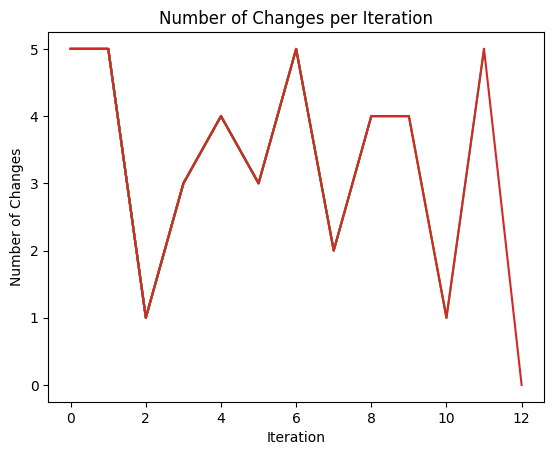

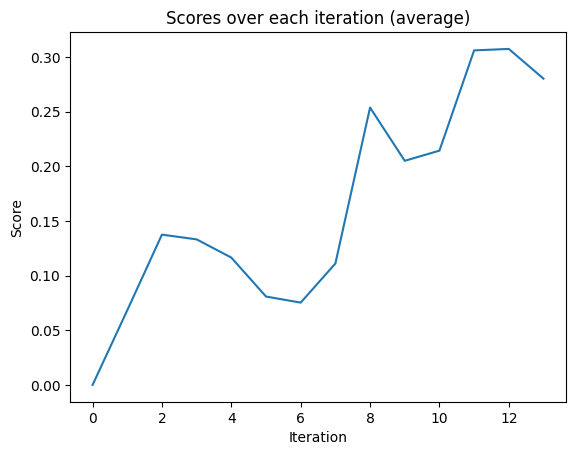

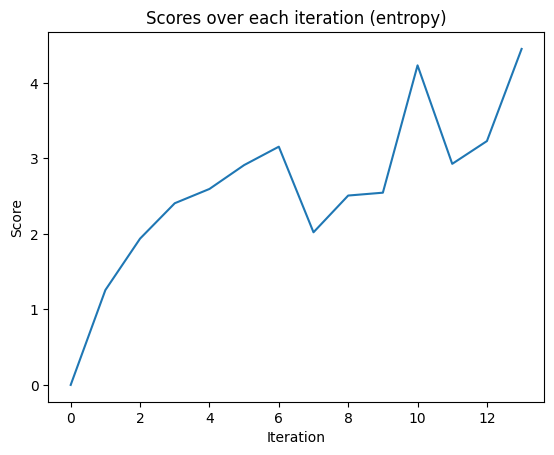

In [ ]:
#@markdown
###
import math
from IPython.utils.text import num_ini_spaces
import os

bi = burn_in

if deterministic:
  random.seed(seed)

AAs = "ARNDCEQGHILKMFPSTWYV"

original = original.strip()

def FindAllChar(str, char):
    lst = []
    for i in range(len(str)):
        if str[i] == char:
            lst.append(i)
    return lst

def CopyList(lst):
  ret = []
  for val in lst:
    ret.append(val)
  return ret

def ListIsEqual(l1, l2):
  if len(l1) != len(l2):
    return False
  for i in range(len(l1)):
    if l1[i] != l2[i]:
      return False
  return True

def Update(attempts, sequence, num_to_change = None, threshold = 0.0 ):
  if num_to_change is None or num_to_change == -1:
    num_to_change = len(attempts)
  attempts.sort(key = lambda x: x[1]['score'])
  attempts.reverse()
  updates = 0
  i = 0
  while i < len(attempts) and updates < num_to_change:
    index = attempts[i][0]
    if attempts[i][1]['sequence'].split()[index] != sequence[index] and attempts[i][1]['score'] > threshold:
      sequence[index] = attempts[i][1]['sequence'].split()[index]
      updates += 1
    i += 1
    if updates == num_to_change:
      return sequence, updates
  return sequence, updates

def Normalize(probabilities):
  factor = 1 / sum(probabilities)
  return [p*factor for p in probabilities]

def UpdateNoThresh(attempts, sequence, num_to_change=None, slow=False):
  updates = 0
  if not slow:
    for a in attempts:
      probabilities = [x[1]['score'] for x in a]
      chosen = random.choices(a, weights=probabilities, k=1)[0]
      old_char = sequence[chosen[0]]
      new_char = chosen[1]['sequence'].split()[chosen[0]]
      sequence[chosen[0]] = new_char
      if old_char != new_char:
        updates += 1
  else:
    flat = [a for attempt in attempts for a in attempt]
    probabilities = [x[1]['score'] for x in flat]
    normalized = Normalize(probabilities)
    choices = random.choices(flat, weights=normalized, k=num_to_change)
    for chosen in choices:
      old_char = sequence[chosen[0]]
      new_char = chosen[1]['sequence'].split()[chosen[0]]
      sequence[chosen[0]] = new_char
      if old_char != new_char:
        updates += 1
  return sequence, updates

def ScoreProbAverage(sequence, attempts):
  total = 0
  for a in attempts:
    char = sequence[a[0]]
    for unmask in a[1]:
      if unmask['token_str'] == char:
        total += unmask['score']
  return total / len(sequence)

def ScoreProbEntropy(sequence, attempts):
  total = 0
  for a in attempts:
    char = sequence[a[0]]
    for unmask in a[1]:
      if unmask['token_str'] == char:
        total += math.log(unmask['score'], 2) * unmask['score']
  return total * -1


def LogSetup(identifier, seq):
  logfile = open(f"logfile_{identifier}_{seq}.txt", "w")
  if use_custom_weights == "no":
    logfile.write("No custom weights used\n")
  if use_custom_weights != "From computer":
    logfile.write(f'Weights from:\t{path_to_file_in_colab}\n')
  else:
    logfile.write(f'Custom weights from personal machine\n')
  logfile.write(f"Original:\t{original}\n")
  logfile.write(f"Masked:\t{masked}\n\n")
  logfile.write(f"Order type:\t{order}\n")
  logfile.write(f"Deterministic:\t{deterministic}\n")
  if deterministic:
    logfile.write(f"Random seed:\t{seed}\n")
  # logfile.write(f"Randomize iterations:\t{str(randomize_every_iteration)}\n")
  logfile.write(f"Max iterations:\t{number_of_iterations}\n")
  if use_threshold:
    logfile.write(f"Max changes per iteration:\t{num_changes_to_keep}\n")
  else:
    logfile.write(f"Slowdown:\t{slowdown}\n")
  logfile.write(f"Threshold %:\t{keep_threshold_percent}\n\n")
  if burn_in > 0:
    logfile.write(f"Burn in iterations:\t{burn_in}\n")
    logfile.write(f"Burn in max changes:\t{burn_percent}\n")
    logfile.write(f"Burn in threshold %:\t{burn_num_to_keep}\n\n")
  return logfile

def LogSummary(logfile, iteration, original, new, data, datalog=5 ,score_avg=None, score_ent=None):
  # original = "".join(data[0][1]['sequence'])
  data.sort(key=lambda x:x[0])
  new = " ".join(new)
  # print(data)

  num_alpha = 0
  for c in original:
    if c.isalpha():
      num_alpha += 1
  num_str = ""
  for i in range(5, len("".join(original.split())) + 1, 5):
    if i == 5:
      num_str += f"        {i}"
      continue
    if len(str(i)) > len(str(i - 5)):
      num_str += " "
    num_str += "".join([" "] * (10 - len(str(i)))) + str(i)



  change_str = ""
  for i in range(len(original)):
    if original[i] != new[i]:
      change_str += "*"
    elif original[i].isalpha() and " ".join(masked)[i] == '_':
      change_str += '-'
    else:
      change_str += " "
  num_mask_str = ""
  num_masked = 0
  add_stack = []
  for i in range(len(change_str)):
    if change_str[i] in ['-', '*']:
      num_masked += 1
      if num_masked % 5 == 0:
        num_mask_str += str(num_masked)
        for _ in range(len(str(num_masked))):
          add_stack.append("")

    if len(add_stack) != 0:
      add_stack.pop()
    else:
      num_mask_str += " "


  orig_spl = original.split()
  new_spl = new.split()

  logfile.write(f"Iteration {iteration - 1}:\n")
  if score_avg is not None:
    logfile.write(f"Score (average): {score_avg}\n")
  if score_ent is not None:
    logfile.write(f"Score (entropy): {score_ent}\n")
  logfile.write(f"\t       {num_str}\n")
  logfile.write(f"\tStart: {original}\n")
  logfile.write(f"\t       {change_str}\n")
  logfile.write(f"\tEnd:   {new}\n")
  logfile.write(f"\t       {num_mask_str}\n")
  logfile.write(f"\t{change_str.count('*')} changes from previous start of iteration\n")
  logfile.write("\n")

  for mask in data:
    if orig_spl[mask[0]] != new_spl[mask[0]]:
      logfile.write("*")
    logfile.write(f"\tMask {mask[0] + 1}: {orig_spl[mask[0]]} -> {new_spl[mask[0]]}\n\t")
    for d in mask[1][:datalog]:
      logfile.write(f"\t{d['token_str']}: {d['score']:.7f}\t")
    logfile.write("\n")

if MLM_model:
  orig_batch = []
  mask_batch = []
  all_results = []

  scores_avg = [0.0]
  scores_ent = [0.0]


  if not process_batch:
    orig_batch.append(original)
    mask_batch.append(masked)
  else:
    with open(path_to_batch, "r") as fp:
      for line in fp.readlines():
        orig_batch.append(line.strip())
        mask_batch.append("")


  for i in range(len(orig_batch)):
    print("".join(["-"]*30))
    original = orig_batch[i]
    masked = mask_batch[i]
    ###
    assert all(c in AAs for c in original), f"Sequence must contain only letters corresponding to the 20 amino acids\n\ti.e. ARNDCEQGHILKMFPSTWYV\nProvided: {original}"
    if use_random_sequence:
      original = ""
      for v in range(random_sequence_length):
        original += AAs[random.randrange(0, len(AAs))]
      masked = "".join(["_"]*random_sequence_length)
    #Remove possible whitespace
    original = "".join(original.split())
    if match_original:
      masked = "_" * len(original)
    assert len(original) == len(masked), f"Original sequence and masked sequence must be the same length\n\tOriginal length: {len(original)}\n\tMasked length: {len(masked)}"
    ###

    import time
    t1 = time.time()

    if write_log:
      logfile = LogSetup(i, original[:3])



    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer, device=device)

    ###preprocess###
    new_seq = ""
    col_seq = ""
    #Make a clean, standardized string using _ for masks
    for c in masked.replace('x', '_').replace(r'[MASK]', '_'):
      if not c.isspace():
        if spaces_in_output:
          col_seq += (c + " ")
        else:
          col_seq += c

    #Make masked string according to BERT standard
    new_seq = ' '.join(''.join(col_seq.split()))
    orig = ' '.join(''.join(original.split()))

    # print(orig)
    print("Generating from: ", original.replace(' ', ''), "\n", "         using: ", new_seq.replace(' ', ''))
    num_masked = "".join(new_seq).count("_")
    print(f"Number of masked residues: {num_masked}")
    modify = new_seq.split()

    locations = FindAllChar(modify, '_')
    if order == 'right-to-left':
      locations.reverse()
    elif order == 'random':
      random.shuffle(locations)

    orig_spl = orig.split()
    retain = orig.split()
    before = cp.deepcopy(orig_spl)


    iterations = []
    iterations.append("".join(orig_spl))
    pbar = tqdm(total=(number_of_iterations * len(locations)), position=0, leave=True)
    for _ in range(number_of_iterations):
      data = []
      iterations.append("".join(orig_spl))
      changes = []
      noThreshChanges = []
      if order == 'random':
        random.shuffle(locations)
      attempts = []
      for val in locations:
        orig_spl = cp.deepcopy(before)
        orig_spl[val] = '[MASK]'

        noThreshCont = []


        # if get_score:
        #   numlog = 30
        # elif num_to_log < 5:
        #   numlog = 5
        # else:
        #   numlog = num_to_log

        numlog = 30

        masked_seq = " ".join(orig_spl)
        # inputs = tokenizer(masked_seq, return_tensors='pt')
        # inputs.to(device)
        # unmask= unmasker(inputs, top_k=numlog)

        unmask= unmasker(masked_seq, top_k=numlog)

        attempts.append((val, unmask))

        data.append( (val, unmask) )
        for attempt in unmask:
          if attempt['token'] >= 5:
            orig_spl = before
            changes.append((val, attempt))
            if use_threshold:
              break
            else:
              noThreshCont.append((val, attempt))
        if not use_threshold:
          noThreshChanges.append(noThreshCont)
        pbar.update(1)
      retain = cp.deepcopy(before)

      score_avg = ScoreProbAverage(before, attempts)
      scores_avg.append(score_avg)
      if display_score_average:
        desc_avg = f" Current score (average): {score_avg}"
      else:
        desc_avg = ""


      score_ent = ScoreProbEntropy(before, attempts)
      scores_ent.append(score_ent)
      if display_score_entropy:
        desc_ent = f" Current score (entropy): {score_ent}"
      else:
        desc_ent = ""
      if bi > 0:
        bi -= 1
        if use_threshold:
          orig_spl, num_changed = Update(changes, before, threshold=burn_percent, num_to_change=burn_num_to_keep)
        else:
          orig_spl, num_changed = UpdateNoThresh(noThreshChanges, before, num_to_change=burn_num_to_keep, slow=slowdown)
      else:
        if use_threshold:
          orig_spl, num_changed = Update(changes, before, threshold=keep_threshold_percent, num_to_change=num_changes_to_keep)
        else:
          orig_spl, num_changed = UpdateNoThresh(noThreshChanges, before, num_to_change=num_changes_to_keep, slow=slowdown)
      # orig_spl, num_changed = Update(changes, before, threshold=keep_threshold_percent, num_to_change=num_changes_to_keep)
      description_str = f"{num_changed} changes from previous iteration." + desc_avg + desc_ent
      pbar.set_description(description_str)
      # pbar.set_description(f"{num_changed} changes from previous iteration. Current score{score_avg}")
      if write_log:
        LogSummary(logfile, len(iterations), "".join(changes[0][1]['sequence']), orig_spl, data, datalog=num_to_log, score_avg=score_avg, score_ent=score_ent)
      if ListIsEqual(retain, orig_spl) and use_threshold:
        print("\nConverged")
        all_results.append("".join(orig_spl))
        break

    pbar.close()

    iterations.append("".join(orig_spl))
    if write_log:
      print(f"Progress and results dumped to logfile_{i}.txt")
      logfile.close()

    if not ListIsEqual(retain, orig_spl):
      print(f"\nNo convergence in {number_of_iterations} iterations")


    if spaces_in_output:
      # print("Original: ", " ".join(retain))
      print("\nFinal Result:\n", " ".join(orig_spl))
    else:
      # print("Original: ", "".join(retain))
      print("\nFinal Result:\n", "".join(orig_spl))

    print("Time: ", time.time() - t1)


    def PrintColoredDifferences(l1, l2, color='red', fin = "", score_avg=None, score_ent=None):
      length = len(l1)
      num_diff = 0
      num_c = []
      assert len(l1) == len(l2), "DifferentSize error"
      for i in range(len(l1)):
        if l1[i] == l2[i]:
          print(f"{l2[i]}", end = fin)
        else:
          print(colored(f"{l2[i]}", 'red'), end = fin)
          num_diff += 1
      print(" | ", end="")
      if display_num_different:
        print(f" {num_diff:^{len(' Changes |') - 3}}", end= "|")
      if display_score_average:
        print(f" {score_avg:^{len('| Avg. Score |') - 3}.4f}", end="|")
      if display_score_entropy:
        print(f" {score_ent:^{len('| Avg. Score |') - 3}.4f}", end="|")

      print()
      return num_diff


    if display_iterations:
      print("Iterations:")
      num_c = []
      print(f"{'Sequence':^{1 + len(iterations[0])}}", end = "|")
      if display_num_different:
        print(" Changes |", end = "")
      if display_score_average:
        print(" Avg. Score |", end = "")
      if display_score_entropy:
        print(" Ent. Score |", end = "")
      print()
      for i in range(1, len(iterations)):
        if spaces_in_output:
          num_c.append(PrintColoredDifferences(iterations[i - 1], iterations[i], 'red', " ", score_avg=scores_avg[i - 1], score_ent=scores_ent[i - 1]))
        else:
          num_c.append(PrintColoredDifferences(iterations[i - 1], iterations[i], 'red', "", score_avg=scores_avg[i - 1], score_ent=scores_ent[i - 1]))
        if display_score_average:
          pass
        plt.plot(num_c[1:])
        plt.title("Number of Changes per Iteration")
        plt.xlabel('Iteration')
        plt.ylabel('Number of Changes')
      plt.show()


    if display_score_average:
      plt.plot(scores_avg)
      plt.title("Scores over each iteration (average)")
      plt.xlabel('Iteration')
      plt.ylabel('Score')
      plt.show()

    if display_score_entropy:
      plt.plot(scores_ent)
      plt.title("Scores over each iteration (entropy)")
      plt.xlabel('Iteration')
      plt.ylabel('Score')
      plt.show()


  # print("".join(["-"]*30))
  # print("Summary:")
  # for r in all_results:
  #   print(r) Okay, so I think I see the problem. Go to line 411 and change that "iterations[i - 1]" to "iterations[0]"